In [1]:
#loading the data


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
fake = pd.read_csv("dataset/Fake.csv")
true = pd.read_csv("dataset/True.csv")

# Creating category labels
fake["category"] = 1   # fake news
true["category"] = 0   # true news


In [4]:
df = pd.concat([fake, true], axis=0)


In [5]:
df = df.sample(frac=1).reset_index(drop=True)


In [6]:
df.head()

,title,text,subject,date,category
0,Trump Just Got DESTROYED By J.K. Rowling For ...,Donald Trump topped off his disastrous press c...,News,"February 18, 2017",1
1,"Susan Collins Bucked Party, Voted To Protect ...",Even though Senator Susan Collins voted with t...,News,"January 12, 2017",1
2,VIOLENT NPR EMPLOYEE Who Is Also A Refugee ARR...,On Monday Politico reported that a protester w...,left-news,"Feb 14, 2017",1
3,Honduras vote count shows president Hernandez ...,TEGUCIGALPA (Reuters) - Honduran President Jua...,worldnews,"November 29, 2017",0
4,Defense Secretary Mattis addresses confusion o...,RIYADH (Reuters) - U.S. Defense Secretary Jim ...,politicsNews,"April 19, 2017",0


In [7]:
df.shape

(44898, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [9]:
df.text[10]

'On Sunday night, actress Meryl Streep called out president-elect Donald Trump s behavior without even mentioning his name. That was too much for Trump supporters to handle and Kellyanne Conway, the president-elect s mouthpiece, was not happy about it. In response to Ms. Streep s impassioned speech at the Golden Globe awards, Conway said that instead, the actress should have called for unity behind the president-elect. That s sort of the opposite of what Trump is doing right now on Twitter while bashing Meryl Streep because of his fragile ego. We have to now form a government, and I m concerned that somebody with a platform like Meryl Streep is also, I think, inciting people s worst instincts,  Conway said.  When she won t get up there and say,  I don t like it, but let s try to support him and see where we can find some common ground with him, which [Trump] has actually done from moment one. Watch:.@KellyannePolls: I m concerned that somebody with a platform like Meryl Streep s is inc

In [10]:
##Preprocessing

In [11]:
#joining the data the two data frame and reseting index
df=pd.concat([fake,true]).reset_index(drop=True)


In [12]:
# Porter2 stemmer 

In [13]:
!pip install nltk


In [14]:
import nltk
from nltk.stem import SnowballStemmer


In [15]:
stemmer = SnowballStemmer("english")


In [16]:
text = ['Fake news is a type of yellow journalism or propaganda']

stemmed_text = [
    " ".join(stemmer.stem(word) for word in sentence.split())
    for sentence in text
]

stemmed_text


['fake news is a type of yellow journal or propaganda']

In [17]:
# Tokenize the text
words = text[0].split()
stems = [stemmer.stem(word) for word in words]
print(stems)

['fake', 'news', 'is', 'a', 'type', 'of', 'yellow', 'journal', 'or', 'propaganda']


In [18]:
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk

# Download the 'stopwords' dataset if it's not already downloaded
nltk.download('stopwords')

# Initialize the Snowball stemmer for english
stemmer = SnowballStemmer("english")

# The stemmer on the text data
def stemming(content):
    con = re.sub('[^a-zA-Z]', ' ', content)
    con = con.lower()
    con = con.split()
    # Apply the Snowball stemmer and filter out the stopwords
    con = [stemmer.stem(word) for word in con if not word in stopwords.words('english')]
    stems = ' '.join(con)

    return stems

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stemming('Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam.')

'daniel greenfield shillman journal fellow freedom center new york writer focus radic islam'

In [20]:
df['text']

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
44893    BRUSSELS (Reuters) - NATO allies on Tuesday we...
44894    LONDON (Reuters) - LexisNexis, a provider of l...
44895    MINSK (Reuters) - In the shadow of disused Sov...
44896    MOSCOW (Reuters) - Vatican Secretary of State ...
44897    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 44898, dtype: object

In [21]:
# Download the 'stopwords' dataset if it's not already downloaded
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Initialize the Snowball stemmer for english
stemmer = SnowballStemmer("english")

In [23]:
# The stemmer on the text data
def stemming(content):
    con = re.sub('[^a-zA-Z]', ' ', content)
    con = con.lower()
    con = con.split()
    # Apply the Snowball stemmer and filter out the stopwords
    con = [stemmer.stem(word) for word in con if not word in stopwords.words('english')]
    stems = ' '.join(con)

    return stems

In [24]:
stemming('Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam.')

'daniel greenfield shillman journal fellow freedom center new york writer focus radic islam'

In [25]:
df.columns


Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')

In [26]:
df["label"] = df["category"].map({
    1: "REAL",
    0: "FAKE"
})


In [27]:
df[["category", "label"]].head()


,category,label
0,1,REAL
1,1,REAL
2,1,REAL
3,1,REAL
4,1,REAL


## Visualization

In [28]:
!pip install matplotlib seaborn


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

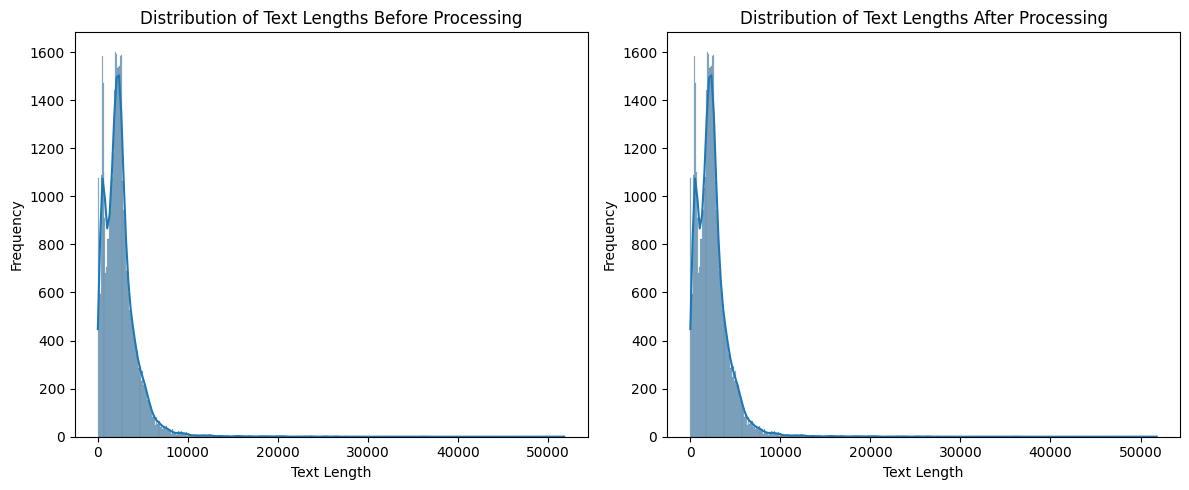

In [30]:


#length of each text before processing
original_text_lengths = [len(text) for text in df['text'] ] # Replace with your original text data

# length of each text after processing
processed_text_lengths = [len(text) for text in df['text'] ] # Replace with your processed text data
# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of text lengths before processing
sns.histplot(original_text_lengths, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Text Lengths Before Processing')
ax[0].set_xlabel('Text Length')
ax[0].set_ylabel('Frequency')

# Plot the distribution of text lengths after processing
sns.histplot(processed_text_lengths, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Text Lengths After Processing')
ax[1].set_xlabel('Text Length')
ax[1].set_ylabel('Frequency')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

##  Split the dataset into training and testing sets

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X = df["text"]
y = df["category"]   # 1 = REAL, 0 = FAKE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7, stratify=y
)


In [33]:
# Join the tokens back into single strings
#X_train = [' '.join(doc) for doc in X_train]
#X_test = [' '.join(doc) for doc in X_test] dONT Use this 

In [34]:
X_train

19981    Flint s Democrat Mayor Karen Weaver is throwin...
36123    DUBAI (Reuters) - U.S President Donald Trump s...
31601    WASHINGTON (Reuters) - President Barack Obama ...
42678    LONDON (Reuters) - Britain s main opposition L...
26457    WASHINGTON (Reuters) - Four of Washington’s la...
                               ...                        
18190    We love this guy! Factory worker Keith Ketzler...
35165    KAMPALA (Reuters) - Ugandan legislators voted ...
17295    This decision by the Supreme Court is confusin...
8230     Depending on how you look at it, being able to...
17831    Harvey Weinstein s wife, Georgina Chapman, has...
Name: text, Length: 35918, dtype: object

## 4. Feature Engineering on text data (TF-IDF)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [37]:
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train and test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)